In [1]:
import sqlite3

In [2]:
conn=sqlite3.connect("sales_data.db")
cursor=conn.cursor()

In [3]:
cursor.execute("""
CREATE TABLE IF NOT EXISTS sales (
    id INTEGER PRIMARY KEY AUTOINCREMENT,
    customer_name TEXT,
    product TEXT,
    product_id TEXT,
    quantity INTEGER,
    price_per_each REAL,
    total_price REAL
)
""")
conn.commit()

In [4]:
sales_data = [
    ("Aarav", "Laptop", "P009", 2, 50000, 100000),
    ("Priya", "Smartphone", "P014", 1, 20000, 20000),
    ("Ravi", "Washing Machine", "P021", 1, 18000, 18000),
    ("Sneha", "Microwave", "P027", 3, 8000, 24000),
    ("Karan", "TV", "P033", 1, 45000, 45000),
    ("Meera", "Refrigerator", "P042", 2, 30000, 60000),
    ("Vikram", "Air Conditioner", "P017", 1, 35000, 35000),
    ("Ananya", "Blender", "P038", 4, 4000, 16000),
    ("Rahul", "Laptop", "P011", 1, 52000, 52000),
    ("Ishita", "Headphones", "P025", 2, 2500, 5000),
    ("Nikhil", "Smartwatch", "P046", 1, 12000, 12000),
    ("Sanya", "Vacuum Cleaner", "P019", 2, 15000, 30000),
    ("Arjun", "Oven", "P031", 1, 14000, 14000),
    ("Tara", "Camera", "P008", 1, 45000, 45000),
    ("Kabir", "Printer", "P044", 1, 11000, 11000),
    ("Neha", "Tablet", "P022", 2, 18000, 36000),
    ("Rohan", "Monitor", "P013", 1, 16000, 16000),
    ("Diya", "Keyboard", "P036", 3, 2000, 6000),
    ("Siddharth", "Mouse", "P028", 2, 1000, 2000),
    ("Avni", "Projector", "P041", 1, 30000, 30000),
    ("Manish", "Router", "P007", 1, 5000, 5000),
    ("Pooja", "Charger", "P018", 4, 800, 3200),
    ("Krishna", "External Hard Drive", "P039", 1, 7000, 7000),
    ("Alok", "Power Bank", "P010", 2, 1500, 3000),
    ("Jyoti", "Gaming Console", "P045", 1, 40000, 40000),
    ("Amit", "Smartphone", "P015", 2, 25000, 50000),
    ("Ritika", "Smart TV", "P020", 1, 60000, 60000),
    ("Varun", "Earbuds", "P030", 3, 3000, 9000),
    ("Shreya", "Mixer", "P047", 2, 5000, 10000),
    ("Gaurav", "Fan", "P004", 2, 3500, 7000),
    ("Divya", "Heater", "P032", 1, 9000, 9000),
    ("Aditya", "Camera Lens", "P002", 1, 25000, 25000),
    ("Pavan", "Tripod", "P035", 1, 4500, 4500),
    ("Simran", "Speaker", "P024", 2, 6000, 12000),
    ("Harsh", "Fitness Band", "P048", 1, 4000, 4000),
    ("Nisha", "Air Purifier", "P012", 1, 15000, 15000),
    ("Rajesh", "Geyser", "P016", 1, 10000, 10000),
    ("Akash", "Smart Light", "P029", 4, 1500, 6000),
    ("Komal", "Washing Machine", "P050", 1, 22000, 22000),
    ("Deepak", "Coffee Maker", "P005", 2, 7000, 14000),
    ("Lakshmi", "Dishwasher", "P037", 1, 45000, 45000),
    ("Santosh", "TV", "P023", 2, 40000, 80000),
    ("Maya", "Smartphone", "P006", 1, 30000, 30000),
    ("Arnav", "Laptop", "P026", 1, 60000, 60000),
    ("Leela", "Refrigerator", "P034", 1, 32000, 32000),
    ("Yash", "Oven", "P003", 1, 13000, 13000),
    ("Snehal", "Blender", "P040", 2, 4500, 9000),
    ("Vani", "Iron", "P043", 1, 3000, 3000),
    ("Tejas", "Microwave", "P001", 1, 10000, 10000),
    ("Farhan", "Vacuum Cleaner", "P049", 1, 18000, 18000),
]


In [5]:
cursor.executemany("""
INSERT INTO sales (customer_name, product, product_id, quantity, price_per_each, total_price)
VALUES (?, ?, ?, ?, ?, ?)
""", sales_data)
conn.commit()

In [16]:
import pandas as pd
#Total sales quantity & revenue per product
query1 = """
SELECT product, 
       SUM(quantity) AS total_qty, 
       SUM(total_price) AS revenue
FROM sales
GROUP BY product
ORDER BY revenue DESC
"""

df1 = pd.read_sql_query(query1, conn)
print("Total Sales by Product:\n", df1)


Total Sales by Product:
                 product  total_qty   revenue
0                Laptop          4  212000.0
1                    TV          3  125000.0
2            Smartphone          4  100000.0
3          Refrigerator          3   92000.0
4              Smart TV          1   60000.0
5        Vacuum Cleaner          3   48000.0
6            Dishwasher          1   45000.0
7                Camera          1   45000.0
8       Washing Machine          2   40000.0
9        Gaming Console          1   40000.0
10               Tablet          2   36000.0
11      Air Conditioner          1   35000.0
12            Microwave          4   34000.0
13            Projector          1   30000.0
14                 Oven          2   27000.0
15          Camera Lens          1   25000.0
16              Blender          6   25000.0
17              Monitor          1   16000.0
18         Air Purifier          1   15000.0
19         Coffee Maker          2   14000.0
20              Speaker       

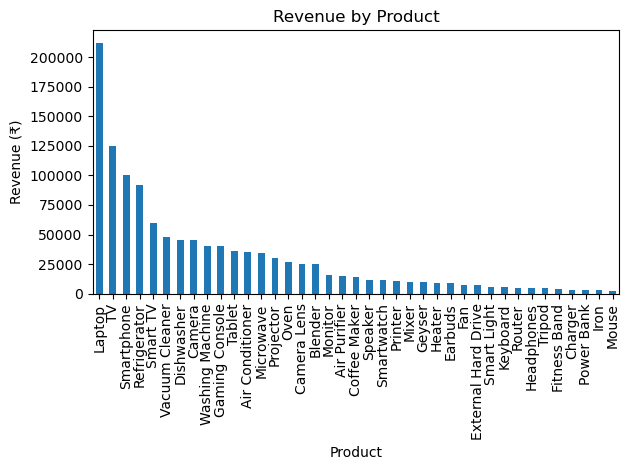

In [17]:
import matplotlib.pyplot as plt

df.plot(kind="bar", x="product", y="revenue", legend=False)
plt.title("Revenue by Product")
plt.ylabel("Revenue (₹)")
plt.xlabel("Product")
plt.tight_layout()
plt.savefig("sales_chart.png")  # save chart
plt.show()


In [18]:
# Top 5 customers by total spending
query2="""
SELECT customer_name, SUM(total_price) AS total_spent
FROM sales
GROUP BY customer_name
ORDER BY total_spent DESC
LIMIT 5
"""
df2 = pd.read_sql_query(query2, conn)
print("\nTop 5 Customers by Spending:\n", df2)


Top 5 Customers by Spending:
   customer_name  total_spent
0         Aarav     100000.0
1       Santosh      80000.0
2        Ritika      60000.0
3         Meera      60000.0
4         Arnav      60000.0


In [22]:
#Total revenue by product category
query3="""
SELECT product, SUM(total_price) AS revenue
FROM sales
GROUP BY product
ORDER BY revenue DESC
"""
df3 = pd.read_sql_query(query3, conn)
print("\n:Total revenue by product category\n", df3)


:Total revenue by product category
                 product   revenue
0                Laptop  212000.0
1                    TV  125000.0
2            Smartphone  100000.0
3          Refrigerator   92000.0
4              Smart TV   60000.0
5        Vacuum Cleaner   48000.0
6            Dishwasher   45000.0
7                Camera   45000.0
8       Washing Machine   40000.0
9        Gaming Console   40000.0
10               Tablet   36000.0
11      Air Conditioner   35000.0
12            Microwave   34000.0
13            Projector   30000.0
14                 Oven   27000.0
15          Camera Lens   25000.0
16              Blender   25000.0
17              Monitor   16000.0
18         Air Purifier   15000.0
19         Coffee Maker   14000.0
20              Speaker   12000.0
21           Smartwatch   12000.0
22              Printer   11000.0
23                Mixer   10000.0
24               Geyser   10000.0
25               Heater    9000.0
26              Earbuds    9000.0
27         

In [20]:
#Highest-selling product by quantity
query4="""
SELECT product, SUM(quantity) AS total_qty
FROM sales
GROUP BY product
ORDER BY total_qty DESC
LIMIT 1
"""
df4 = pd.read_sql_query(query4, conn)
print("\nHighest-Selling Product:\n", df4)



Highest-Selling Product:
    product  total_qty
0  Blender          6


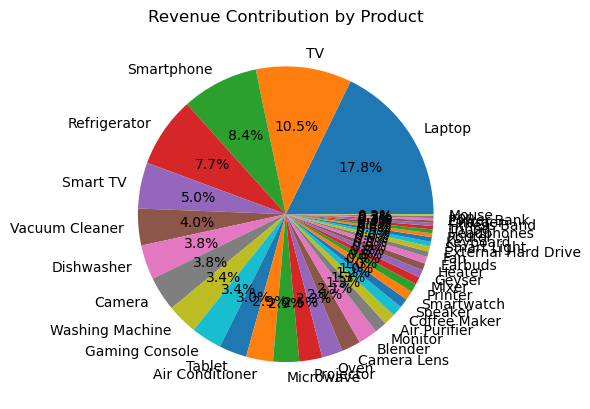

In [23]:
# Pie chart: revenue contribution by product
df1.plot.pie(y="revenue", labels=df1["product"], autopct="%1.1f%%", legend=False)
plt.title("Revenue Contribution by Product")
plt.ylabel("")
plt.show()